In [1069]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1070]:
df = pd.read_excel(r'C:\Users\kdelfino\Documents\GitHub\PM2_Lineup_Dashboard\PM2-LINEUP-DASHBOARD\PM2 SCHEDULER.xlsx')

In [1071]:
# Check data
df.head()

,Full Roster,AKA,05-01-24-A,05-01-24-B,05-01-24-C,05-02-24-A,05-02-24-B,05-02-24-C,05-03-24-A,05-03-24-B,...,05-29-24-C,05-30-24-A,05-30-24-B,05-30-24-C,05-31-24-A,05-31-24-B,05-31-24-C,06-01-24-A,06-01-24-B,06-01-24-C
0,Ali Ronsom,Ali,POST-LACE,ROUTING,ROUTING,ROUTING,PRE-ALR,POST-LACE,NaN,NaN,...,WINDERS,PRE-ALR,TESTER,WINDERS,PRE-WYE 2,BLOCKER 2,PRE-ALR,ROUTING,PRE-WYE 2,ROUTING Q
1,Andrew Blake,AJ,WINDERS,PRE-TUB S1,BLOCKER 2,NaN,NaN,NaN,NaN,NaN,...,PRE-TUB F,ROUTING,BLOCKER 1,TESTER,BLOCKER 2,PRE-TUB Q,PRE-WYE 2,ROUTING Q,EGRESS,ROUTING
2,Arnold Salto Cortez,Arnold,PRE-TUB Q,ROUTING,PRE-WYE 1,EGRESS,PRE-TUB S1,ROUTING,BLOCKER 2,ROUTING C,...,BLOCKER 2,PRE-TUB S,PRE-WYE 2,ROUTING,INGRESS,INGRESS,INGRESS,NaN,NaN,NaN
3,Ben Marvin,Ben,ROUTING,BLOCKER 2,ROUTING,BLOCKER 2,PRE-TUB Q,ROUTING,PRE-WYE 2,BLOCKER 2,...,ROUTING,BLOCKER 1,ROUTING,POST-LACE,ROUTING,PRE-TUB H,BLOCKER 2,BLOCKER 1,POST-LACE,ROUTING
4,Berly Phillip,Phillip,PRE-TUB H,TESTER,BLOCKER 1,ROUTING,BLOCKER 2,INGRESS,BLOCKER 1,ROUTING,...,ROUTING,NaN,NaN,NaN,PRE-WYE 1,ROUTING,BLOCKER 1,BLOCKER 2,ROUTING,PRE-WYE 2


In [1072]:
# Replace NaN with 'Callout'
df.fillna('Callout',inplace=True)

In [1073]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 56 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Full Roster  34 non-null     object
 1   AKA          34 non-null     object
 2   05-01-24-A   34 non-null     object
 3   05-01-24-B   34 non-null     object
 4   05-01-24-C   34 non-null     object
 5   05-02-24-A   34 non-null     object
 6   05-02-24-B   34 non-null     object
 7   05-02-24-C   34 non-null     object
 8   05-03-24-A   34 non-null     object
 9   05-03-24-B   34 non-null     object
 10  05-03-24-C   34 non-null     object
 11  05-04-24-A   34 non-null     object
 12  05-04-24-B   34 non-null     object
 13  05-04-24-C   34 non-null     object
 14  05-09-24-A   34 non-null     object
 15  05-09-24-B   34 non-null     object
 16  05-09-24-C   34 non-null     object
 17  05-10-24-A   34 non-null     object
 18  05-10-24-B   34 non-null     object
 19  05-10-24-C   34 non-null     ob

In [1074]:
# Transpose and use AKA as Column header
df = df.set_index('AKA').drop(columns='Full Roster').T
df.head()

AKA,Ali,AJ,Arnold,Ben,Phillip,Carlos,Cat,Christian,Cody,Everardo,...,Shakira,Theo,Billy,Callout,Callout,Callout,Callout,Callout,Callout,Station
05-01-24-A,POST-LACE,WINDERS,PRE-TUB Q,ROUTING,PRE-TUB H,PRE-TUB F,LEAD Z1,WATCHER Z3,ZIPTIE,ROUTING,...,PRE-WYE 2,PRE-WYE 1,LEAD FLOAT,Callout,Callout,Callout,Callout,Callout,Callout,Date
05-01-24-B,ROUTING,PRE-TUB S1,ROUTING,BLOCKER 2,TESTER,POST-LACE,LEAD Z1,WATCHER Z3,BLOCKER 1,INGRESS,...,PRE-TUB H,ROUTING,LEAD FLOAT,Callout,Callout,Callout,Callout,Callout,Callout,Rotation
05-01-24-C,ROUTING,BLOCKER 2,PRE-WYE 1,ROUTING,BLOCKER 1,ROUTING,LEAD Z1,WATCHER Z3,PRE-TUB H,PRE-TUB F,...,ROUTING,PRE-ALR,LEAD FLOAT,Callout,Callout,Callout,Callout,Callout,Callout,Callout
05-02-24-A,ROUTING,Callout,EGRESS,BLOCKER 2,ROUTING,PRE-WYE 1,LEAD Z1,WATCHER Z3,ZIPTIE,PRE-TUB F,...,WINDERS,WINDERS,LEAD Z3,Callout,Callout,Callout,Callout,Callout,Callout,Callout
05-02-24-B,PRE-ALR,Callout,PRE-TUB S1,PRE-TUB Q,BLOCKER 2,Callout,LEAD Z1,WATCHER Z3,PRE-TUB S2,ROUTING,...,TESTER,PRE-WYE 1,LEAD Z3,Callout,Callout,Callout,Callout,Callout,Callout,Callout


In [1076]:
# reload data
df2 = pd.read_excel('PM2 SCHEDULER.xlsx')

In [1077]:
# drop last row 
df2.drop(index=27,inplace=True)

In [1078]:
# Replace NaN with 'Callout'
df2.fillna('Callout',inplace=True)

In [1079]:
# drop full roster
df2.drop(columns='Full Roster', inplace=True)

In [1080]:
df2.head()

,AKA,05-01-24-A,05-01-24-B,05-01-24-C,05-02-24-A,05-02-24-B,05-02-24-C,05-03-24-A,05-03-24-B,05-03-24-C,...,05-29-24-C,05-30-24-A,05-30-24-B,05-30-24-C,05-31-24-A,05-31-24-B,05-31-24-C,06-01-24-A,06-01-24-B,06-01-24-C
0,Ali,POST-LACE,ROUTING,ROUTING,ROUTING,PRE-ALR,POST-LACE,Callout,Callout,Callout,...,WINDERS,PRE-ALR,TESTER,WINDERS,PRE-WYE 2,BLOCKER 2,PRE-ALR,ROUTING,PRE-WYE 2,ROUTING Q
1,AJ,WINDERS,PRE-TUB S1,BLOCKER 2,Callout,Callout,Callout,Callout,Callout,Callout,...,PRE-TUB F,ROUTING,BLOCKER 1,TESTER,BLOCKER 2,PRE-TUB Q,PRE-WYE 2,ROUTING Q,EGRESS,ROUTING
2,Arnold,PRE-TUB Q,ROUTING,PRE-WYE 1,EGRESS,PRE-TUB S1,ROUTING,BLOCKER 2,ROUTING C,PRE-TUB F,...,BLOCKER 2,PRE-TUB S,PRE-WYE 2,ROUTING,INGRESS,INGRESS,INGRESS,Callout,Callout,Callout
3,Ben,ROUTING,BLOCKER 2,ROUTING,BLOCKER 2,PRE-TUB Q,ROUTING,PRE-WYE 2,BLOCKER 2,PRE-ALR,...,ROUTING,BLOCKER 1,ROUTING,POST-LACE,ROUTING,PRE-TUB H,BLOCKER 2,BLOCKER 1,POST-LACE,ROUTING
4,Phillip,PRE-TUB H,TESTER,BLOCKER 1,ROUTING,BLOCKER 2,INGRESS,BLOCKER 1,ROUTING,POST-LACE,...,ROUTING,Callout,Callout,Callout,PRE-WYE 1,ROUTING,BLOCKER 1,BLOCKER 2,ROUTING,PRE-WYE 2


In [1081]:
df_new = pd.DataFrame(columns= ['AKA','Station','Date','Rotation'])

In [1082]:
list(df2.drop(columns='AKA').columns)[2].rsplit('-',1)[0]

'05-01-24'

In [1083]:
for i in range(len(df2)):
    for j in range(len(df2.drop(columns='AKA').columns)):    
        
        temp_df = [
            df2.iat[i,0], #AKA
            df2.iat[i,j+1], #Station
            list(df2.drop(columns='AKA').columns)[j].rsplit('-',1)[0], # Date
            list(df2.drop(columns='AKA').columns)[j].rsplit('-',1)[1] # Rotation
            
        ]
        df_new.loc[len(df_new.index)] = temp_df
       

df_new   
  

,AKA,Station,Date,Rotation
0,Ali,POST-LACE,05-01-24,A
1,Ali,ROUTING,05-01-24,B
2,Ali,ROUTING,05-01-24,C
3,Ali,ROUTING,05-02-24,A
4,Ali,PRE-ALR,05-02-24,B
...,...,...,...,...
1777,Station,Callout,05-31-24,B
1778,Station,Callout,05-31-24,C
1779,Station,Callout,06-01-24,A
1780,Station,Callout,06-01-24,B


In [1084]:
# Check for Naming Inconsistency
for col in df_new.columns:
    print(f"Checking {col}:\n{df_new[col].value_counts()}")
    # Separtor for readability 
    print("___________________________")

Checking AKA:
Callout       270
Ali            54
Jean           54
Billy          54
Theo           54
Shakira        54
Salina         54
Bob            54
Marckenson     54
Lance          54
KC             54
Korina         54
Kim            54
Justin         54
Jasmine        54
AJ             54
Jaden          54
Ivan           54
Hayden         54
Berto          54
Everardo       54
Cody           54
Christian      54
Cat            54
Carlos         54
Phillip        54
Ben            54
Arnold         54
Station        54
Name: AKA, dtype: int64
___________________________
Checking Station:
Callout        547
ROUTING        150
WINDERS         90
BLOCKER 1       56
PRE-TUB H       53
LEAD Z1         51
PRE-ALR         48
PRE-TUB F       48
LEAD Z3         48
WATCHER Z1      48
ROUTING C       47
POST-LACE       47
WATCHER Z3      47
PRE-WYE 2       46
PRE-WYE 1       45
BLOCKER 2       43
TESTER          43
PRE-TUB S1      38
PRE-TUB S2      37
WATCHER Z2      30
LEAD FLOAT    

In [1085]:
df_new['Station'] = df_new['Station'].apply(lambda x: x.strip())

In [1086]:
df_new['Station'].value_counts()

Callout        547
ROUTING        188
WINDERS         91
BLOCKER 1       57
PRE-TUB H       53
WATCHER Z3      51
LEAD Z1         51
POST-LACE       50
LEAD Z3         48
WATCHER Z1      48
ROUTING C       48
PRE-TUB F       48
PRE-ALR         48
BLOCKER 2       47
PRE-WYE 2       47
PRE-WYE 1       47
TESTER          44
PRE-TUB S1      38
PRE-TUB S2      37
LEAD FLOAT      30
WATCHER Z2      30
PRE-TUB Q       27
PRE-TUB S       24
EGRESS          22
INGRESS         20
LEAD Z2         15
ZIPTIE           9
FLEXED           4
ROUTING Q        2
ROUNTING C       2
BLOCKER2         1
PRE-WYE  2       1
BLOCKER - 2      1
INGERSS          1
PRE-TUB 1        1
WINDER 2         1
WINDER 1         1
Date             1
Rotation         1
Name: Station, dtype: int64

In [1087]:
df_new['Station'] = df_new['Station'].apply(lambda x: x.replace('WINDER 1','WINDERS') )
df_new['Station'] = df_new['Station'].apply(lambda x: x.replace('WINDER 2','WINDERS') )
df_new['Station'] = df_new['Station'].apply(lambda x: x.replace('BLOCKER2','BLOCKER 2'))
df_new['Station'] = df_new['Station'].apply(lambda x: x.replace('PRE-WYE  2','PRE-WYE 2'))
df_new['Station'] = df_new['Station'].apply(lambda x: x.replace('PRE-TUB 1','PRE-TUB S1'))
df_new['Station'] = df_new['Station'].apply(lambda x: x.replace('ROUNTING C','ROUTING C'))
df_new['Station'] = df_new['Station'].apply(lambda x: x.replace('INGERS','INGRESS'))
df_new['Station'] = df_new['Station'].apply(lambda x: x.replace('INGRESSS','INGRESS'))
df_new['Station'] = df_new['Station'].apply(lambda x: x.replace('PRE-TUB S1','PRE-TUB S'))
df_new['Station'] = df_new['Station'].apply(lambda x: x.replace('PRE-TUB S2','PRE-TUB S'))

In [1088]:
df_new['Station'].value_counts().sort_values()

Rotation         1
BLOCKER - 2      1
Date             1
ROUTING Q        2
FLEXED           4
ZIPTIE           9
LEAD Z2         15
INGRESS         21
EGRESS          22
PRE-TUB Q       27
LEAD FLOAT      30
WATCHER Z2      30
TESTER          44
PRE-WYE 1       47
PRE-TUB F       48
PRE-ALR         48
PRE-WYE 2       48
LEAD Z3         48
BLOCKER 2       48
WATCHER Z1      48
POST-LACE       50
ROUTING C       50
LEAD Z1         51
WATCHER Z3      51
PRE-TUB H       53
BLOCKER 1       57
WINDERS         93
PRE-TUB S      100
ROUTING        188
Callout        547
Name: Station, dtype: int64

In [1089]:
df_new.groupby(['AKA','Station','Date','Rotation']).count()

Empty DataFrame
Columns: []
Index: [(AJ, BLOCKER - 2, 05-29-24, A), (AJ, BLOCKER 1, 05-25-24, A), (AJ, BLOCKER 1, 05-30-24, B), (AJ, BLOCKER 2, 05-01-24, C), (AJ, BLOCKER 2, 05-11-24, B), (AJ, BLOCKER 2, 05-15-24, B), (AJ, BLOCKER 2, 05-16-24, B), (AJ, BLOCKER 2, 05-17-24, A), (AJ, BLOCKER 2, 05-31-24, A), (AJ, Callout, 05-02-24, A), (AJ, Callout, 05-02-24, B), (AJ, Callout, 05-02-24, C), (AJ, Callout, 05-03-24, A), (AJ, Callout, 05-03-24, B), (AJ, Callout, 05-03-24, C), (AJ, Callout, 05-04-24, A), (AJ, Callout, 05-04-24, B), (AJ, Callout, 05-04-24, C), (AJ, Callout, 05-09-24, A), (AJ, Callout, 05-09-24, B), (AJ, Callout, 05-09-24, C), (AJ, Callout, 05-23-24, A), (AJ, Callout, 05-23-24, B), (AJ, Callout, 05-23-24, C), (AJ, EGRESS, 06-01-24, B), (AJ, PRE-TUB F, 05-10-24, C), (AJ, PRE-TUB F, 05-29-24, C), (AJ, PRE-TUB H, 05-24-24, A), (AJ, PRE-TUB Q, 05-11-24, A), (AJ, PRE-TUB Q, 05-18-24, A), (AJ, PRE-TUB Q, 05-31-24, B), (AJ, PRE-TUB S, 05-01-24, B), (AJ, PRE-TUB S, 05-16-24, C), (AJ, PRE-WYE 1, 05-15-24, A), (AJ, PRE-WYE 1, 05-18-24, C), (AJ, PRE-WYE 1, 05-24-24, C), (AJ, PRE-WYE 1, 05-25-24, B), (AJ, PRE-WYE 2, 05-16-24, A), (AJ, PRE-WYE 2, 05-31-24, C), (AJ, ROUTING, 05-11-24, C), (AJ, ROUTING, 05-15-24, C), (AJ, ROUTING, 05-17-24, B), (AJ, ROUTING, 05-18-240, B), (AJ, ROUTING, 05-24-24, B), (AJ, ROUTING, 05-25-24, C), (AJ, ROUTING, 05-30-24, A), (AJ, ROUTING, 06-01-24, C), (AJ, ROUTING C, 05-10-24, B), (AJ, ROUTING Q, 06-01-24, A), (AJ, TESTER, 05-10-24, A), (AJ, TESTER, 05-29-24, B), (AJ, TESTER, 05-30-24, C), (AJ, WINDERS, 05-01-24, A), (AJ, WINDERS, 05-17-24, C), (Ali, BLOCKER 2, 05-24-24, B), (Ali, BLOCKER 2, 05-31-24, B), (Ali, Callout, 05-03-24, A), (Ali, Callout, 05-03-24, B), (Ali, Callout, 05-03-24, C), (Ali, Callout, 05-04-24, A), (Ali, Callout, 05-04-24, B), (Ali, Callout, 05-04-24, C), (Ali, Callout, 05-16-24, A), (Ali, Callout, 05-16-24, B), (Ali, Callout, 05-16-24, C), (Ali, Callout, 05-17-24, A), (Ali, Callout, 05-17-24, B), (Ali, Callout, 05-17-24, C), (Ali, Callout, 05-18-24, A), (Ali, Callout, 05-18-24, C), (Ali, Callout, 05-18-240, B), (Ali, POST-LACE, 05-01-24, A), (Ali, POST-LACE, 05-02-24, C), (Ali, POST-LACE, 05-10-24, A), (Ali, POST-LACE, 05-11-24, C), (Ali, POST-LACE, 05-23-24, A), (Ali, POST-LACE, 05-23-24, C), (Ali, POST-LACE, 05-24-24, C), (Ali, POST-LACE, 05-25-24, B), (Ali, POST-LACE, 05-29-24, B), (Ali, PRE-ALR, 05-02-24, B), (Ali, PRE-ALR, 05-30-24, A), (Ali, PRE-ALR, 05-31-24, C), (Ali, PRE-TUB F, 05-09-24, C), (Ali, PRE-TUB S, 05-15-24, A), (Ali, PRE-WYE 1, 05-09-24, A), (Ali, PRE-WYE 1, 05-25-24, C), (Ali, PRE-WYE 2, 05-11-24, A), (Ali, PRE-WYE 2, 05-15-24, B), (Ali, PRE-WYE 2, 05-31-24, A), (Ali, PRE-WYE 2, 06-01-24, B), (Ali, ROUTING, 05-01-24, B), (Ali, ROUTING, 05-01-24, C), (Ali, ROUTING, 05-02-24, A), (Ali, ROUTING, 05-09-24, B), (Ali, ROUTING, 05-10-24, B), (Ali, ROUTING, 05-11-24, B), (Ali, ROUTING, 05-15-24, C), (Ali, ROUTING, 05-23-24, B), (Ali, ROUTING, 05-24-24, A), ...]

[1566 rows x 0 columns]

In [1090]:

df_new[(df_new['AKA']==aka)&(df_new['Station']!='Callout')]

,AKA,Station,Date,Rotation
918,Kim,LEAD Z3,05-01-24,A
919,Kim,LEAD Z3,05-01-24,B
920,Kim,LEAD Z3,05-01-24,C
921,Kim,LEAD Z2,05-02-24,A
922,Kim,LEAD Z2,05-02-24,B
923,Kim,LEAD Z2,05-02-24,C
924,Kim,LEAD Z3,05-03-24,A
925,Kim,LEAD Z3,05-03-24,B
926,Kim,LEAD Z3,05-03-24,C
930,Kim,LEAD Z1,05-09-24,A


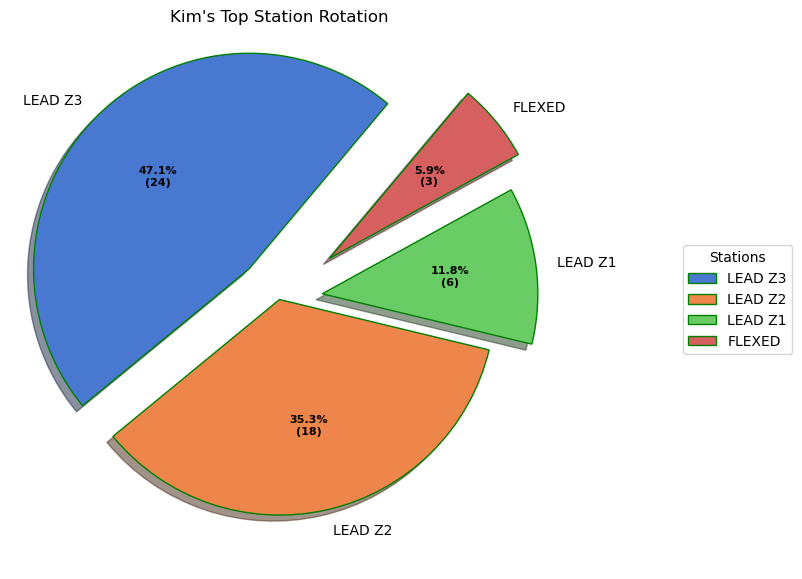

In [1091]:
import random

# Get name
aka = "kim".title()

data_per_aka = df_new[(df_new['AKA']==aka)&(df_new['Station']!='Callout')]
# Creating dataset
Station = data_per_aka['Station'].unique()
 
data = data_per_aka['Station'].value_counts()
 
 
# # Creating explode data
# explode = (0.1,0.2,0.0,0.0,0.2,0.1,0.1,0.2,0.1)
explode = tuple(round(random.uniform(0.0,0.3),1) for i in range(len(Station)))
 
# Creating color parameters
# colors = ("orange", "cyan", "brown",
#           "grey", "indigo", "beige")
 
# Wedge properties
wp = {'linewidth': 1, 'edgecolor': "green"}
 
# Creating autocpt arguments
 
 
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
 
# Creating plot
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  explode=explode,
                                  labels=Station,
                                  shadow=True,
                                #   colors=colors,
                                  startangle=50,
                                  wedgeprops=wp,
                                  textprops=dict(color="Black"))
 
# Adding legend
ax.legend(wedges, Station,
          title="Stations",
          loc="center",
          bbox_to_anchor=(1.1, 0, 0.5, 1))
 
plt.setp(autotexts, size=8, weight="bold")
ax.set_title(f"{aka}'s Top Station Rotation")
 
# show plot
plt.show()

In [1092]:
# Save new df as CSV
import os 
os.makedirs(r'C:\Users\kdelfino\Documents\GitHub\PM2_Lineup_Dashboard\PM2-LINEUP-DASHBOARD', exist_ok=True)

In [1093]:
df_new.to_csv(r'C:\Users\kdelfino\Documents\GitHub\PM2_Lineup_Dashboard\PM2-LINEUP-DASHBOARD\out.cvs')